# Prepare Notebook

In [1]:
%load_ext autoreload
%autoreload 1
%aimport co2_problem_lib

# Imports

In [2]:
from co2_data import (co2_by_month_training_data, co2_dates_training_data, NUMBER_FORECAST_STEPS, 
                      co2_by_month_test_data, co2_dates_test_data)
from co2_problem_lib import plot_forecast

import tensorflow as tf
from tensorflow import keras

# Data

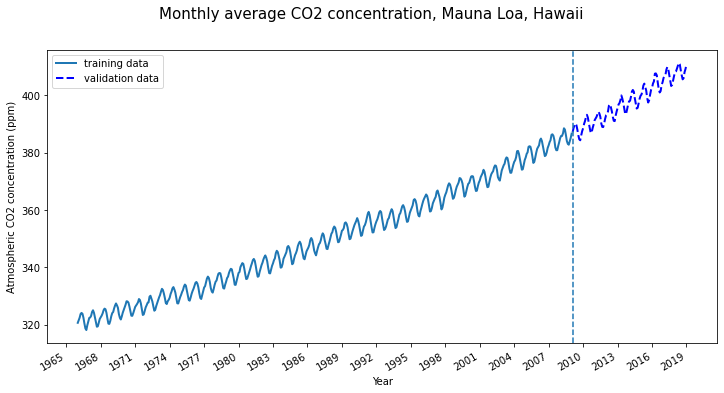

In [3]:
plot_forecast()

## Parameters

In [ ]:
WINDOW_SIZE = 2 * NUMBER_FORECAST_STEPS
BATCH_SIZE = 128
counted_data =  # Tensor of sample number and sample value from co2_by_month_training_data

In [14]:
co2_by_month_training_data

array([320.62, 321.6 , 322.39, 323.7 , 324.08, 323.75, 322.38, 320.36,
       318.64, 318.1 , 319.78, 321.03, 322.33, 322.5 , 323.04, 324.42,
       325.  , 324.09, 322.54, 320.92, 319.25, 319.39, 320.73, 321.96,
       322.57, 323.15, 323.89, 325.02, 325.57, 325.36, 324.14, 322.11,
       320.33, 320.25, 321.32, 322.89, 324.  , 324.42, 325.63, 326.66,
       327.38, 326.71, 325.88, 323.66, 322.38, 321.78, 322.85, 324.12,
       325.06, 325.98, 326.93, 328.14, 328.08, 327.67, 326.34, 324.69,
       323.1 , 323.06, 324.01, 325.13, 326.17, 326.68, 327.17, 327.79,
       328.92, 328.57, 327.36, 325.43, 323.36, 323.56, 324.8 , 326.01,
       326.77, 327.63, 327.75, 329.73, 330.07, 329.09, 328.04, 326.32,
       324.84, 325.2 , 326.5 , 327.55, 328.55, 329.56, 330.3 , 331.5 ,
       332.48, 332.07, 330.87, 329.31, 327.51, 327.18, 328.16, 328.64,
       329.35, 330.71, 331.48, 332.65, 333.09, 332.25, 331.18, 329.39,
       327.43, 327.37, 328.46, 329.57, 330.4 , 331.4 , 332.04, 333.31,
      

In [32]:
import numpy as np
test_list = []
for i, aa in np.ndenumerate(co2_by_month_training_data):
    test_list.append((i[0],aa))

tensor_data = tf.convert_to_tensor(test_list)

In [33]:
print(tensor_data.shape)

(517, 2)


In [34]:
%%timeit
test_list = []
for i, aa in np.ndenumerate(co2_by_month_training_data):
    test_list.append((i[0],aa))

tensor_data = tf.convert_to_tensor(test_list)

560 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
co2_by_month_training_data

array([320.62, 321.6 , 322.39, 323.7 , 324.08, 323.75, 322.38, 320.36,
       318.64, 318.1 , 319.78, 321.03, 322.33, 322.5 , 323.04, 324.42,
       325.  , 324.09, 322.54, 320.92, 319.25, 319.39, 320.73, 321.96,
       322.57, 323.15, 323.89, 325.02, 325.57, 325.36, 324.14, 322.11,
       320.33, 320.25, 321.32, 322.89, 324.  , 324.42, 325.63, 326.66,
       327.38, 326.71, 325.88, 323.66, 322.38, 321.78, 322.85, 324.12,
       325.06, 325.98, 326.93, 328.14, 328.08, 327.67, 326.34, 324.69,
       323.1 , 323.06, 324.01, 325.13, 326.17, 326.68, 327.17, 327.79,
       328.92, 328.57, 327.36, 325.43, 323.36, 323.56, 324.8 , 326.01,
       326.77, 327.63, 327.75, 329.73, 330.07, 329.09, 328.04, 326.32,
       324.84, 325.2 , 326.5 , 327.55, 328.55, 329.56, 330.3 , 331.5 ,
       332.48, 332.07, 330.87, 329.31, 327.51, 327.18, 328.16, 328.64,
       329.35, 330.71, 331.48, 332.65, 333.09, 332.25, 331.18, 329.39,
       327.43, 327.37, 328.46, 329.57, 330.4 , 331.4 , 332.04, 333.31,
      

### Autoregressive dataset

In [5]:
def AutoregressiveDs(windows_size=WINDOW_SIZE, batch_size=BATCH_SIZE):
    """Dataset generator from 'counted_data' base on window_size for single label"""
    return keras.utils.timeseries_dataset_from_array(
        # Define keywords
    )

NameError: name 'WINDOW_SIZE' is not defined

### Single-shot dataset

In [ ]:
def SingleShotDs(windows_size=WINDOW_SIZE, batch_size=BATCH_SIZE, target_size=NUMBER_FORECAST_STEPS):
    """Generate dataframe for 'target_size' label in each sample"""
    single_shot_ds_input = keras.utils.timeseries_dataset_from_array(
        # Define keywords
    )
    
    single_shot_ds_targets = keras.utils.timeseries_dataset_from_array(
        # Define keywords
    )
    
    return tf.data.Dataset.zip

In [ ]:
single_ds = AutoregressiveDs(windows_size=1)
autoregressive_ds = AutoregressiveDs()
single_shot_ds = SingleShotDs()

In [ ]:
tst = list(single_shot_ds.take(1))
print('single_shot_ds', [i.shape for i in tst[0]])
tst = list(autoregressive_ds.take(1))
print('autoregressive_ds', [i.shape for i in tst[0]])
tst = list(single_ds.take(1))
print('single_ds', [i.shape for i in tst[0]])

# Baseline

In [ ]:
class Baseline(tf.keras.Model):
    def __init__(self, target_size):
        super().__init__()
        self.target_size = target_size

    def call(self, inputs):
        """ repeat last value of input for 'target_size' time as result"""
        return result


In [ ]:
tst = Baseline(target_size=NUMBER_FORECAST_STEPS)
res_final = tst(co2_by_month_training_data)
plot_forecast(res_final)

# Linear model

## Scikit

In [ ]:
inx = int(counted_data[-1, 0].numpy()) + 1
test_range = tf.constant(range(inx, inx + NUMBER_FORECAST_STEPS))[:, tf.newaxis, tf.newaxis]
train_range = tf.constant(range(0, inx))[:, tf.newaxis, tf.newaxis]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(train_range[...,0], co2_by_month_training_data)
pred = model.predict(test_range[...,0])
plot_forecast(pred)

## Keras

In [ ]:
simple_linear_model = keras.Sequential([
    # define linear model
])
simple_linear_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.99),
                            loss=keras.losses.MeanSquaredError(),
                            metrics=[keras.metrics.MeanAbsoluteError()])

In [ ]:
his = simple_linear_model.fit(single_ds, epochs=100, verbose=1)

In [ ]:
res_final = simple_linear_model(test_range)
plot_forecast(tf.squeeze(res_final))

# MLP

In [ ]:
mlp = keras.Sequential([
    # define multilayer perceptron model
])
mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.99),
                            loss=keras.losses.MeanSquaredError(),
                            metrics=[keras.metrics.MeanAbsoluteError()])

In [ ]:
his = mlp.fit(autoregressive_ds, epochs=500, verbose=1)

In [ ]:
start_point_test = counted_data[tf.newaxis,-WINDOW_SIZE:,:]

# LSTM

https://www.tensorflow.org/tutorials/structured_data/time_series